# IMPORTING THE LIBRARIES

Подключение Google Drive

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
#import os
#import sys
#sys.path.insert(1, '/content/gdrive/MyDrive/ADfromPython')

Импорт библиотек

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# DATA PRE-PROCESSING

## Download data

In [4]:
df = pd.read_csv("DATE.csv", sep=';', parse_dates=True) # "/content/gdrive/MyDrive/ADfromPython/DATE.csv"

# Переименование столбцов
print(df.columns.to_list())
df.columns = ['input_1', 'input_2', 'input_3', 'input_4', 'input_5', 'output']
df.columns.to_list()

['D4420', 'D4433', '4U27', '4U32', 'L4115', 'D4428']


['input_1', 'input_2', 'input_3', 'input_4', 'input_5', 'output']

## Statistics and information about the dataset.


Статистика набора

In [5]:
from utils.df_describe import print_df_describe

print_df_describe(df=df, name='DF', show=True)

DF (head of the data is):
   input_1  input_2  input_3  input_4  input_5   output
0  1093.80  1848.89     3.78    16.64     1.54  1181.18
1  1097.53  1897.28     3.77    16.65     1.53  1177.49
2  1093.53  1935.90     3.73    16.64     1.53  1177.71
3  1101.58  1998.96     3.74    16.75     1.54  1180.94
4  1103.64  2019.86     3.74    14.93     1.54  1185.77

DF (describe of the data is):
            input_1       input_2       input_3       input_4       input_5  \
count  44640.000000  44640.000000  44640.000000  44640.000000  44640.000000   
mean    1123.163368   1864.407627     19.208756     17.285504      1.573224   
std       34.349140    152.803526     20.023350     13.928399      0.144934   
min     1000.000000   1200.460000      0.000000      0.000000      1.440000   
25%     1105.910000   1815.830000      6.447500     12.660000      1.540000   
50%     1123.580000   1895.750000     12.600000     16.170000      1.550000   
75%     1144.930000   1954.792500     25.010000     19

Информация о датасете

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   input_1  44640 non-null  float64
 1   input_2  44640 non-null  float64
 2   input_3  44640 non-null  float64
 3   input_4  44640 non-null  float64
 4   input_5  44640 non-null  float64
 5   output   44640 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


## Signals graphics

Общий график (выбор временного интервала)

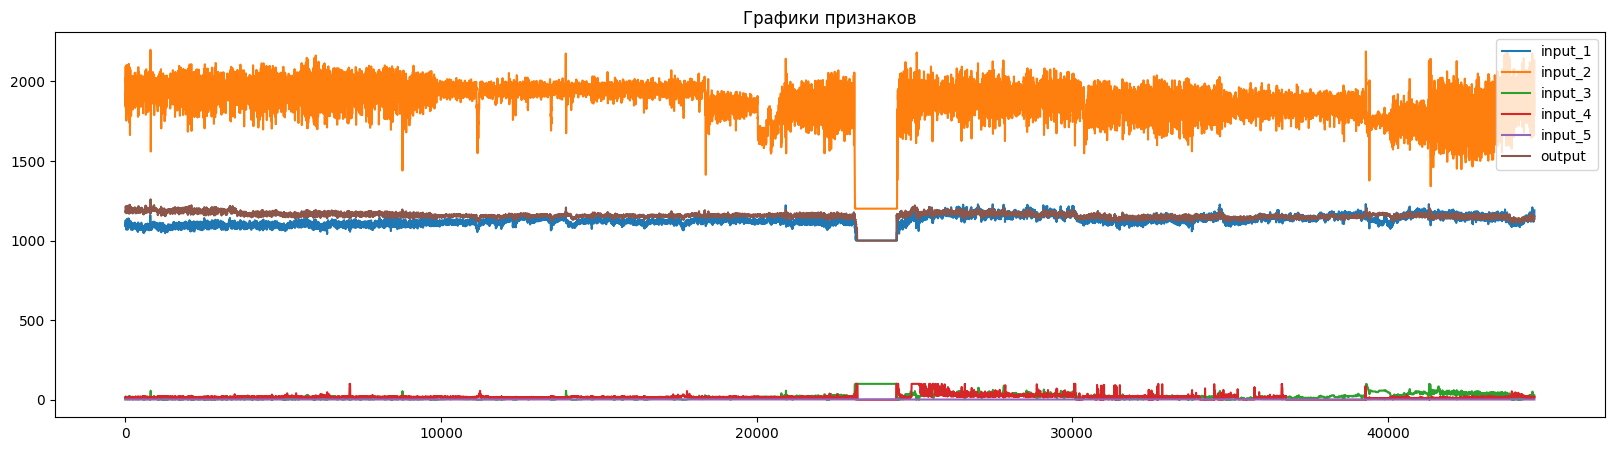

In [7]:
plt.figure(figsize=(20,5))
for col_name in df.columns.to_list():
  df[col_name].plot()
plt.title('Графики признаков')
plt.legend()

Графики сигналов и гистограммы распределения

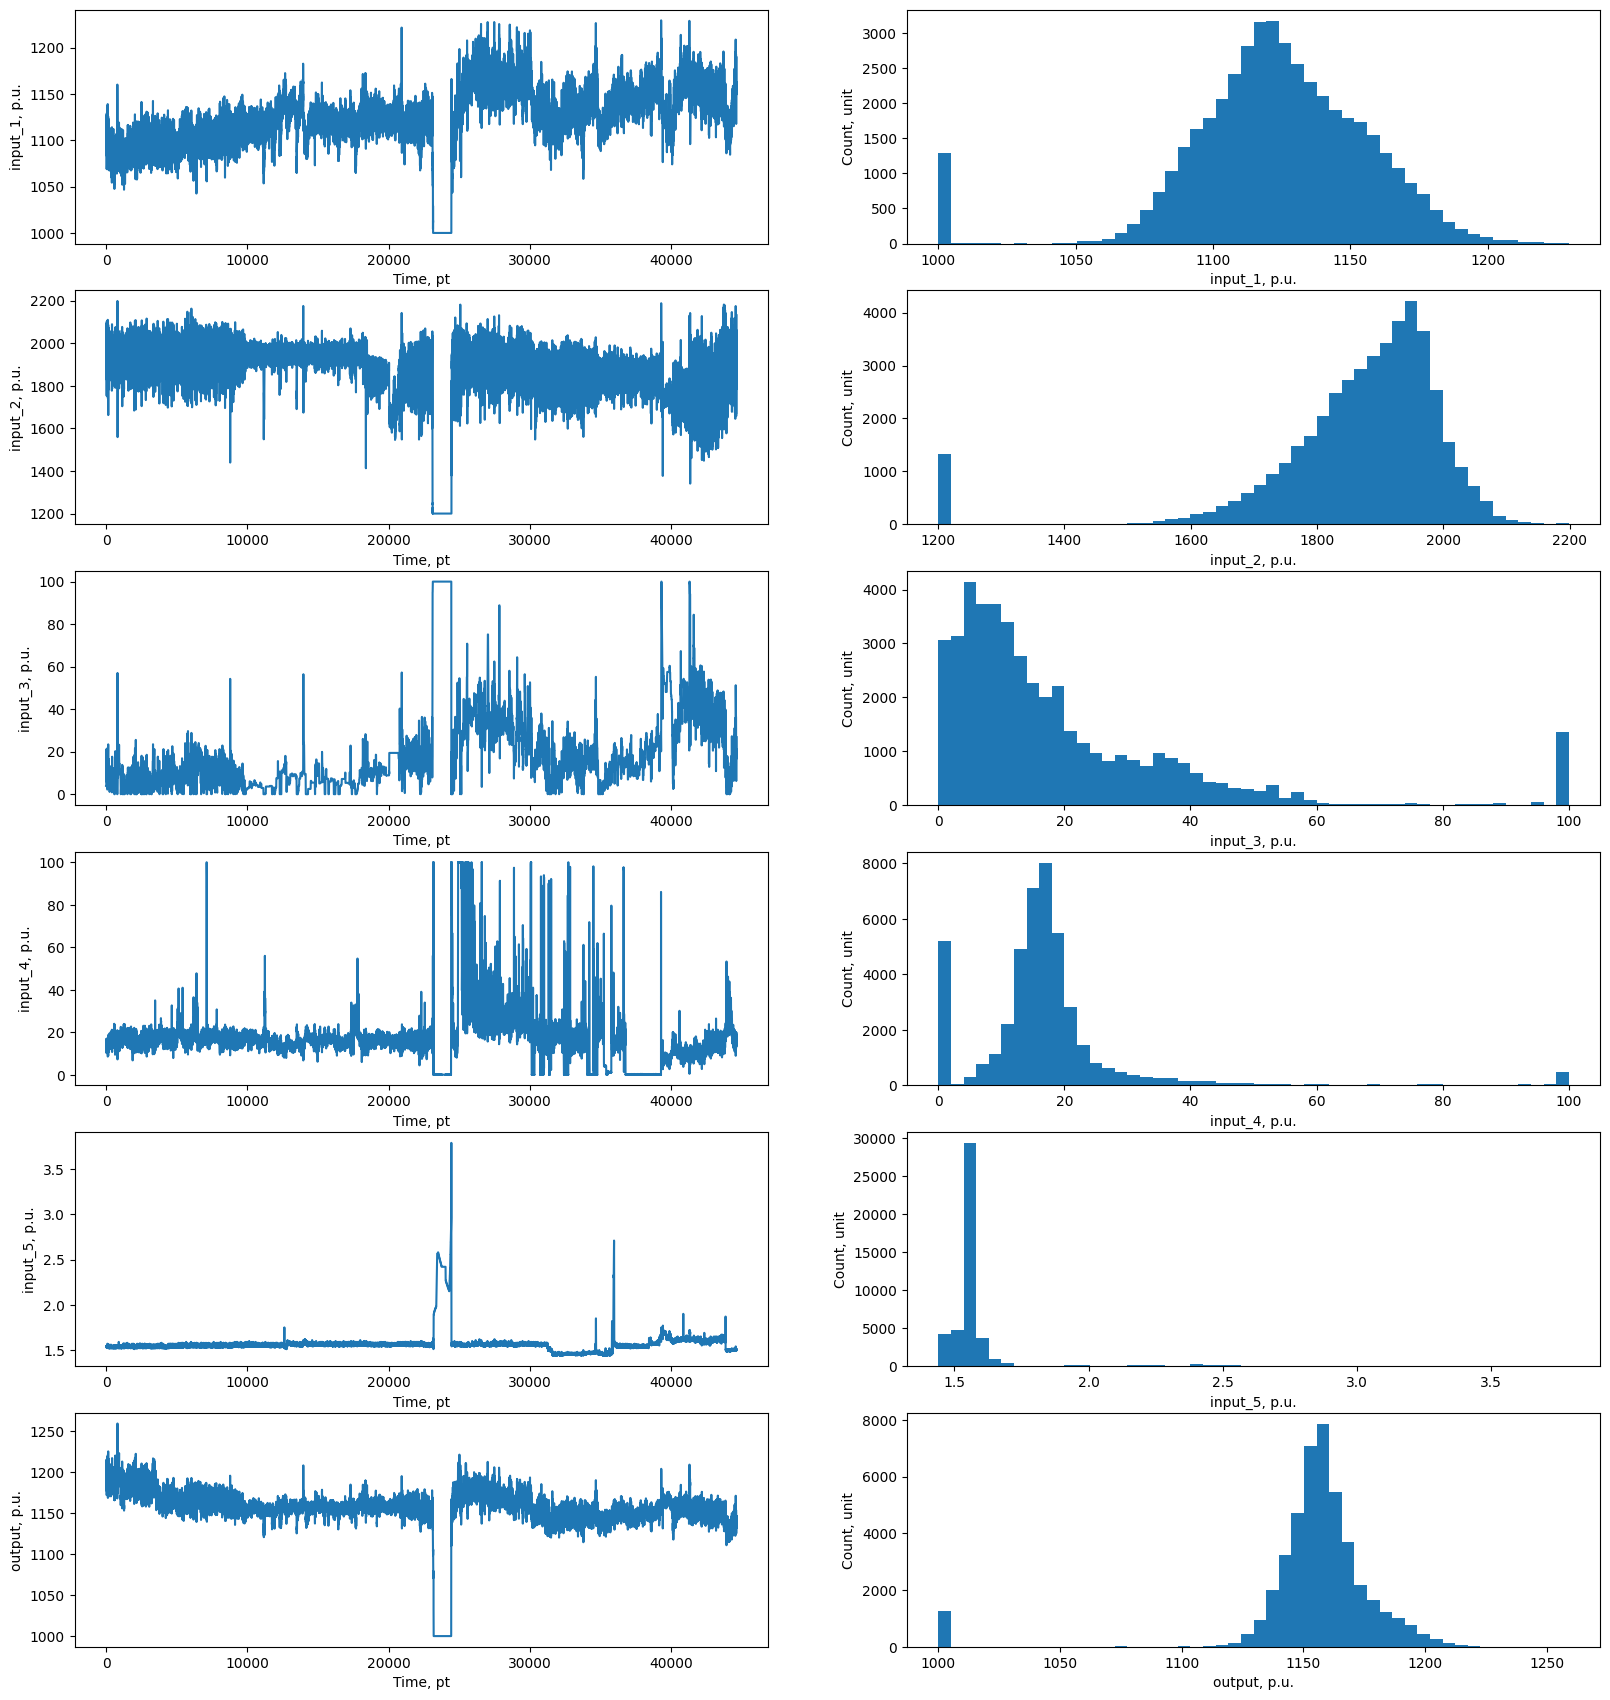

In [8]:
from utils.plot import cm


colums = df.columns.to_list()
fig, axs = plt.subplots(nrows=len(colums), ncols=2, figsize=cm(inch=[50, len(colums)*9]))
for ids, col_name in enumerate(colums):
    axs[ids, 0].plot(df[col_name])
    axs[ids, 0].set_xlabel('Time, pt')
    axs[ids, 0].set_ylabel(f'{col_name}, p.u.')

    axs[ids, 1].hist(df[col_name], bins=50)
    axs[ids, 1].set_xlabel(f'{col_name}, p.u.')
    axs[ids, 1].set_ylabel('Count, unit')
plt.show()

## Signal Correlation

Общая матрица корреляции

<Axes: >

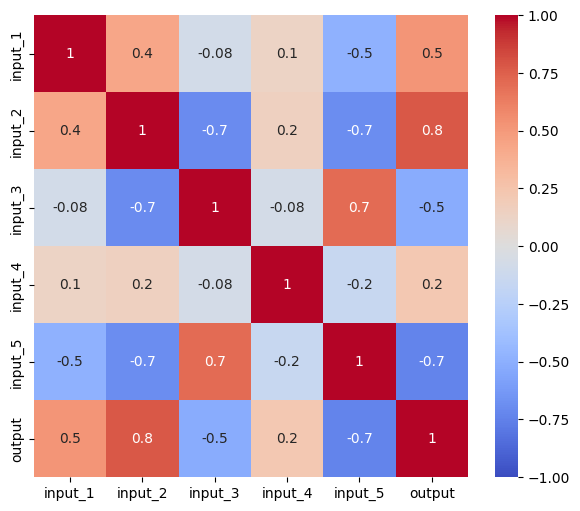

In [9]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1g')

Матрица корреляции выходного сигнала от входных

In [10]:
df.corr()['output'].sort_values(ascending=False)[1:]

input_2    0.774534
input_1    0.517408
input_4    0.224615
input_3   -0.520277
input_5   -0.737570
Name: output, dtype: float64

# PREPARING THE DATASET TO TRAIN THE MODEL

## Выбор отрезка данных

In [11]:
data_work = df[0:10000]

In [12]:
from utils.df_describe import print_df_describe

print_df_describe(df=data_work, name='Data Work', show=True)

Data Work (head of the data is):
   input_1  input_2  input_3  input_4  input_5   output
0  1093.80  1848.89     3.78    16.64     1.54  1181.18
1  1097.53  1897.28     3.77    16.65     1.53  1177.49
2  1093.53  1935.90     3.73    16.64     1.53  1177.71
3  1101.58  1998.96     3.74    16.75     1.54  1180.94
4  1103.64  2019.86     3.74    14.93     1.54  1185.77

Data Work (describe of the data is):
            input_1       input_2       input_3       input_4       input_5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    1097.570410   1946.990724      8.331382     17.286128      1.541739   
std       14.877788     78.592410      5.589553      5.007198      0.011022   
min     1042.530000   1439.900000      0.000000      6.790000      1.510000   
25%     1087.670000   1896.050000      4.370000     15.090000      1.530000   
50%     1096.910000   1952.510000      7.740000     16.865000      1.540000   
75%     1107.292500   2005.212500     11

## Разделение на входные/выходные переменные

In [13]:
feature_rows = ['input_1', 'input_2', 'input_3', 'input_4', 'input_5']
target_rows = ['output']

In [14]:
features = data_work[feature_rows]
target = data_work[target_rows]

In [15]:
from utils.df_describe import print_df_describe

print_df_describe(df=features, name='Features', show=True)

Features (head of the data is):
   input_1  input_2  input_3  input_4  input_5
0  1093.80  1848.89     3.78    16.64     1.54
1  1097.53  1897.28     3.77    16.65     1.53
2  1093.53  1935.90     3.73    16.64     1.53
3  1101.58  1998.96     3.74    16.75     1.54
4  1103.64  2019.86     3.74    14.93     1.54

Features (describe of the data is):
            input_1       input_2       input_3       input_4       input_5
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean    1097.570410   1946.990724      8.331382     17.286128      1.541739
std       14.877788     78.592410      5.589553      5.007198      0.011022
min     1042.530000   1439.900000      0.000000      6.790000      1.510000
25%     1087.670000   1896.050000      4.370000     15.090000      1.530000
50%     1096.910000   1952.510000      7.740000     16.865000      1.540000
75%     1107.292500   2005.212500     11.570000     18.820000      1.550000
max     1160.110000   2198.630000     57.

In [16]:
from utils.df_describe import print_df_describe

print_df_describe(df=target, name='Target', show=True)

Target (head of the data is):
    output
0  1181.18
1  1177.49
2  1177.71
3  1180.94
4  1185.77

Target (describe of the data is):
             output
count  10000.000000
mean    1172.609111
std       15.720204
min     1135.520000
25%     1160.647500
50%     1170.180000
75%     1183.860000
max     1259.140000

Shape of Target : (10000, 1)
--------------------------------------------------------------------------------
Target (is null of the data is):
output    0
dtype: int64

Target (is nan of the data is):
output    0
dtype: int64

Target (duplicated of the data is):
5212
Target (info of the data is):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   output  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB
None


## Data Normalization

*  StandardScaler
*  MinMaxScaler
*  RobustScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

Нормализация данных

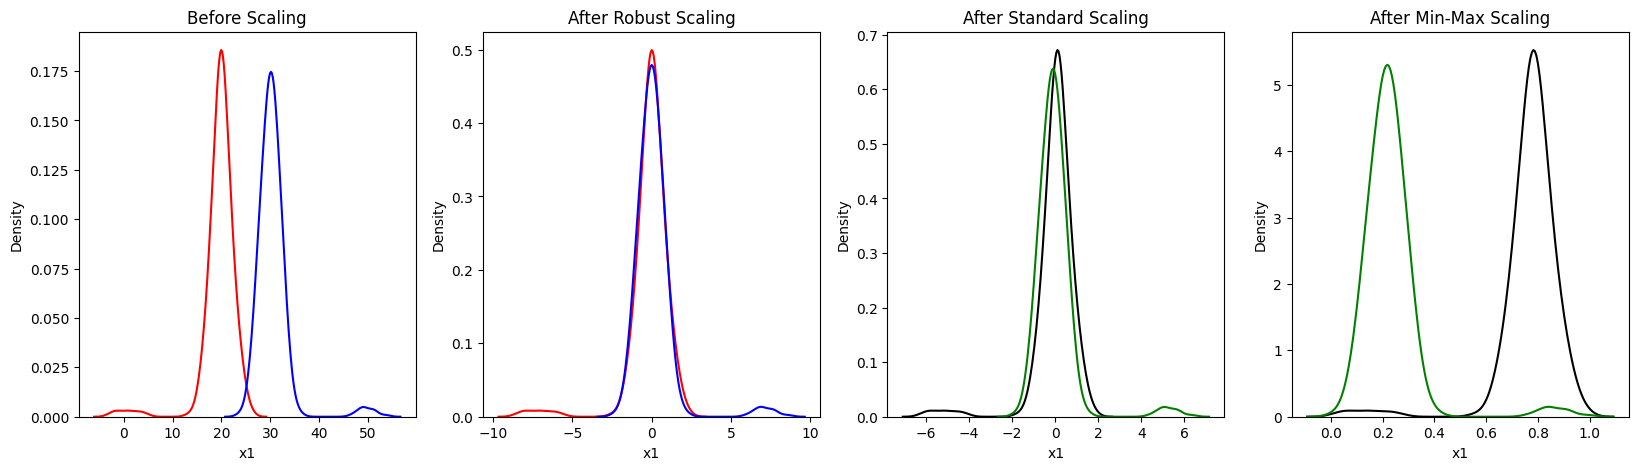

#### Тест

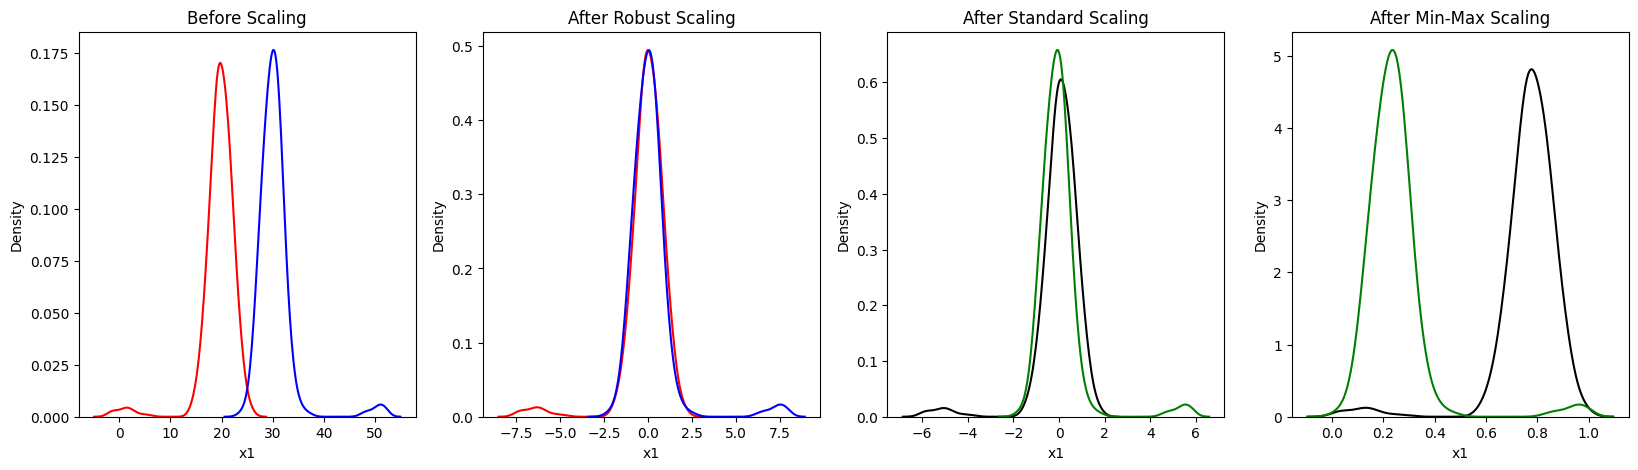

In [18]:
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

### StandardScaler

StandardScaler следует стандартному нормальному распределению (SND) . Следовательно, среднее значение = 0 и масштабирует данные до единичной дисперсии.

In [40]:
scl = StandardScaler().fit(features)
features_final=scl.transform(features)

### MinMaxScaler

MinMaxScaler масштабирует все объекты данных в диапазоне [0, 1] или в диапазоне [-1, 1] , если в наборе данных есть отрицательные значения. Это масштабирование сжимает все вставки в узком диапазоне [0, 0,005] .

In [19]:
min_max_scaler = MinMaxScaler()
features_final = min_max_scaler.fit_transform(features)

При наличии выбросов StandardScaler не гарантирует сбалансированность масштабов признаков из-за влияния выбросов при вычислении эмпирического среднего значения и стандартного отклонения. Это приводит к сужению диапазона значений признака.

### RobustScaler

Используя RobustScaler(), мы можем удалить выбросы, а затем использовать StandardScaler или MinMaxScaler для предварительной обработки набора данных.

Он масштабирует функции, используя статистику, устойчивую к выбросам.

Этот метод удаляет медиану и масштабирует данные в диапазоне от 1-го квартиля до 3-го квартиля. т. е. между 25-м квантилем и 75-м квантилем диапазоном. Этот диапазон также называется Межквартильным диапазоном.
Затем медиана и межквартильный размах сохраняются, чтобы их можно было использовать в будущих данных с помощью метода преобразования. Если в наборе данных присутствуют выбросы, то медиана и межквартильный размах дают лучшие результаты и превосходят выборочное среднее и дисперсию.

RobustScaler использует межквартильный диапазон, чтобы обеспечить устойчивость к выбросам.

In [149]:
robust_scaler = RobustScaler()
features_final = robust_scaler.fit_transform(features)

## Split data

Разделение на тестовую/обучающую выборки

In [20]:
from sklearn.model_selection import train_test_split


features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=False, test_size=0.10)

features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, shuffle=False, test_size=0.20)

# REGRESSION ANALYSIS
Регрессионный анализ
*   LinearRegression
*   Lasso
*   Ridge
*   ElasticNet



In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## LinearRegression

Линейная регрессия (scikit-learn LinearRegression) — это самая базовая форма, в которой модель вообще не наказывается за выбор весов. Это означает, что на этапе обучения, если модель чувствует, что какая-то конкретная функция особенно важна, модель может придать этой функции большое значение. Иногда это приводит к переобучению в небольших наборах данных.

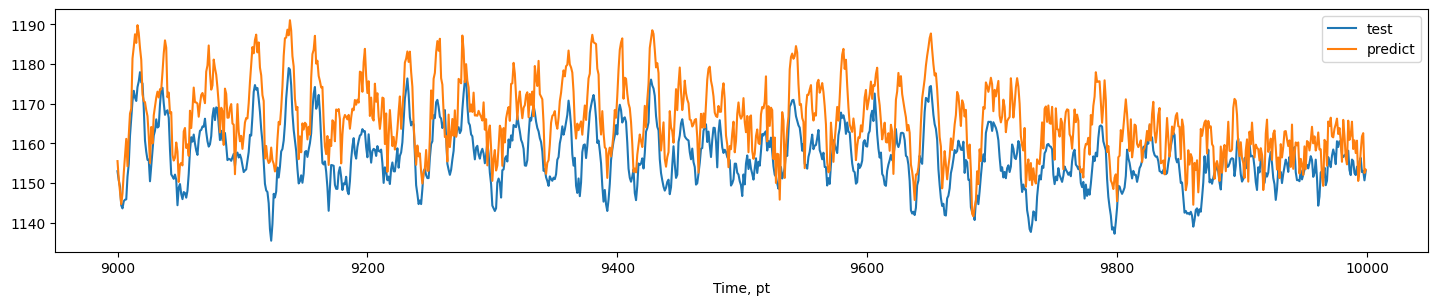

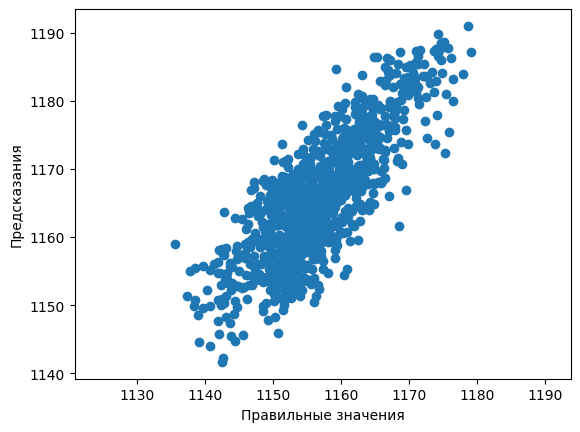

MSE:  111.748
R2:  -1.014


In [44]:
from utils.evaluate_model import evaluate


LR_model = LinearRegression().fit(features_train, target_train)
evaluate(model=LR_model, features=features_test, target=target_test)

## Lasso

Лассо (scikit-learn Lasso) — это модификация линейной регрессии, в которой модель наказывается за сумму абсолютных значений весов. Таким образом, абсолютные значения веса будут (в целом) уменьшены, и многие из них будут стремиться к нулю.

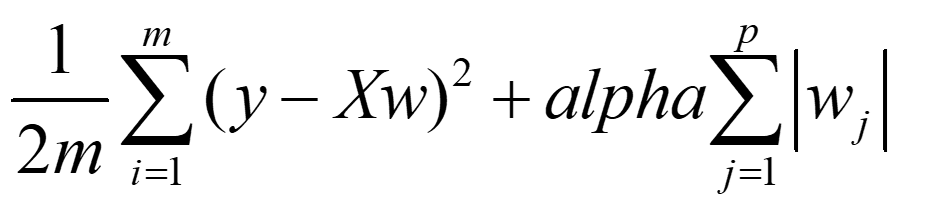

Гиперпараметр альфа — коэффициент для штрафных весов.

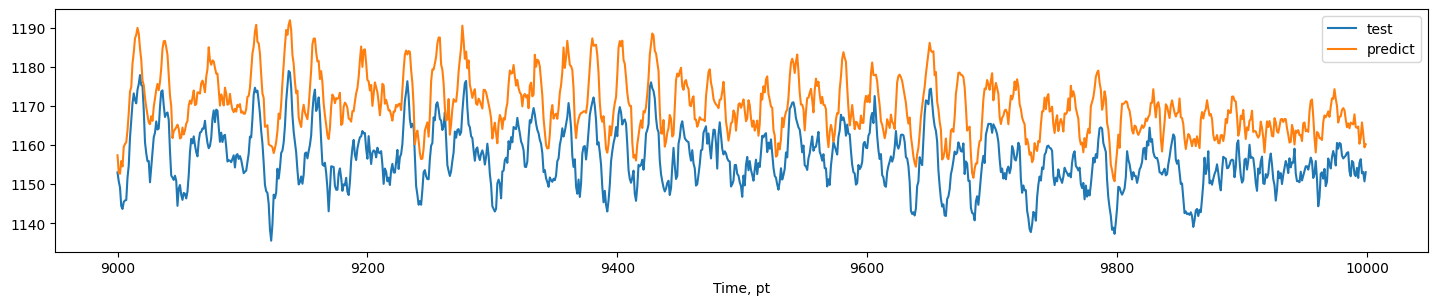

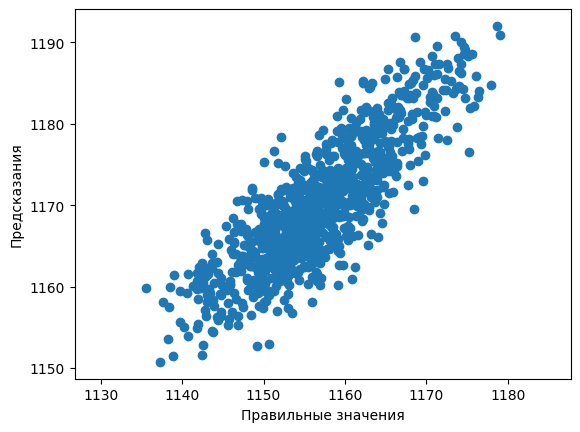

MSE:  194.583
R2:  -2.506


In [45]:
from utils.evaluate_model import evaluate


L_model = Lasso(alpha=1).fit(features_train, target_train)
evaluate(model=L_model, features=features_test, target=target_test)

## Ridge

Ridge (scikit-learn Ridge) идет еще дальше и штрафует модель на сумму квадратов значений весов. Таким образом, веса не только имеют тенденцию иметь меньшие абсолютные значения, но также имеют тенденцию наказывать экстремумы весов, в результате чего группа весов распределяется более равномерно.
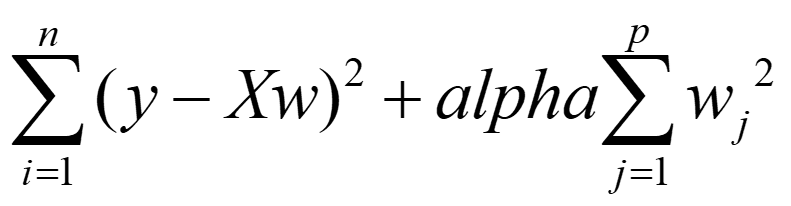

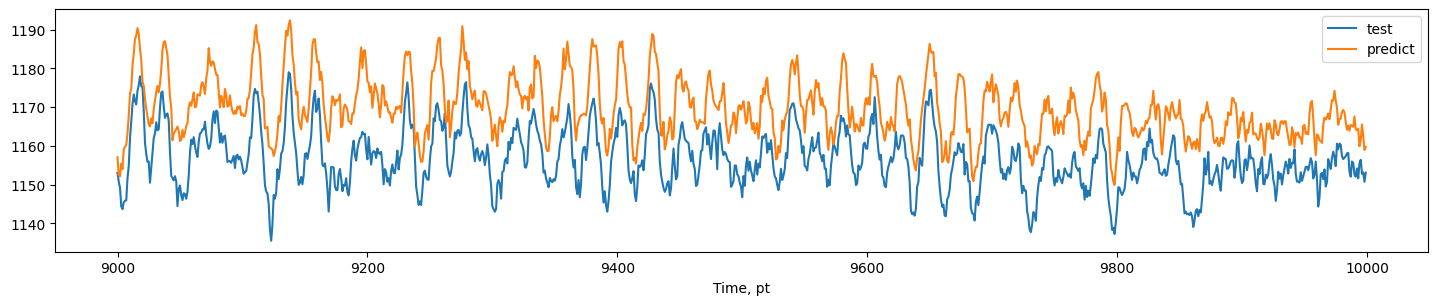

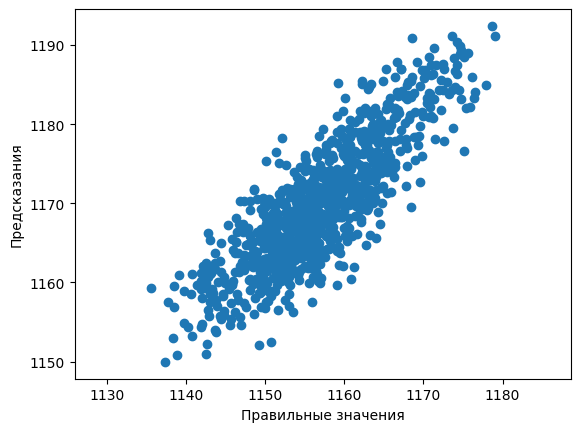

MSE:  188.51
R2:  -2.397


In [46]:
from utils.evaluate_model import evaluate


R_model = Ridge(alpha=1000).fit(features_train, target_train)
evaluate(model=R_model, features=features_test, target=target_test)

## ElasticNet

ElasticNet — это гибрид Lasso и Ridge, в который включены как штрафные санкции по абсолютным значениям, так и квадратичные штрафные санкции, регулируемые другим коэффициентом l1_ratio.

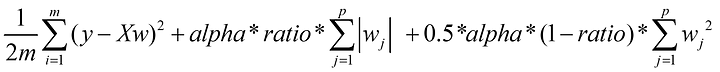

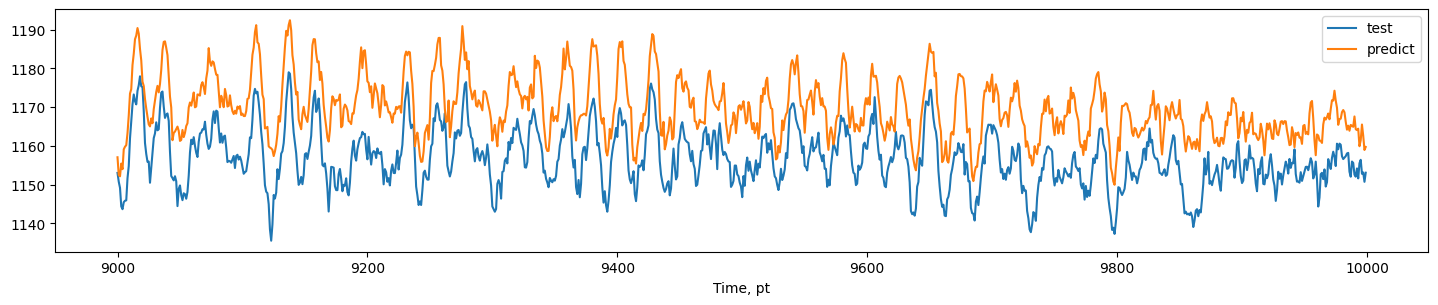

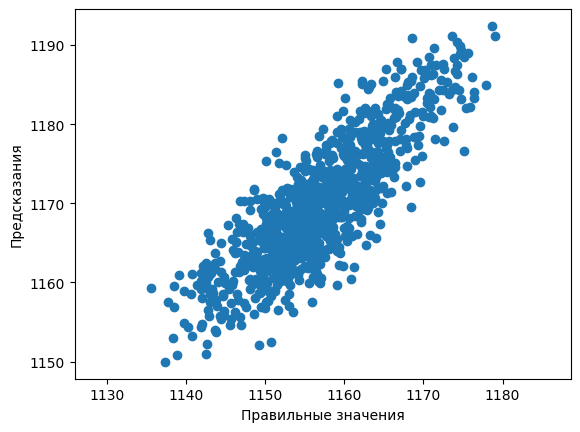

MSE:  188.632
R2:  -2.399


In [47]:
from utils.evaluate_model import evaluate


EN_model = ElasticNet(alpha=0.1, l1_ratio=0.75).fit(features_train, target_train)
evaluate(model=EN_model, features=features_test, target=target_test)

Вывод:

1.  **Прежде чем использовать методы регуляризованной линейной регрессии, необходимо будет масштабировать данные.**

2.  **Lasso, Ridge, ElasticNet для набора данных меньше 100 тыс. строк.**

3.  **Lasso и ElasticNet имеют тенденцию давать редкие веса (большинство нулей).**

    Это связанно с тем, что регуляризация l1 одинаково заботится о снижении больших весов до малых весов или о приведении малых весов к нулю. 
    Если много предикторов (функций) и не все из них так важны, то использование Lasso и ElasticNet - хорошая идея.
    
4.  **Ridge имеет тенденцию давать небольшие, но хорошо распределенные веса.** 
    
    Так как регуляризация l2 больше заботится о приведении большого веса к малому весу, а не о приведении малых весов к нулю. 
    Если есть несколько предикторов, и все они действительно подходят для прогнозов, Ridge хороший метод регуляризованной линейной регрессии.

# KERAS MODEL

In [21]:
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, LSTM

from keras.regularizers import l1, l2, l1_l2

2023-12-26 14:25:33.425514: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 14:25:35.021366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 14:25:35.021408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 14:25:35.166742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 14:25:35.533230: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 14:25:35.533843: I tensorflow/core/platform/cpu_feature_guard.cc:1

### 1

In [23]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1], activation="linear"))
Dense_model.add(Dense(100, activation="linear"))
#Dense_model.add(Dropout(0.2))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(70, activation="linear"))
#Dense_model.add(Dropout(0.25))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(150, activation="linear",)) #kernel_regularizer=l1(0.01)))
##Dense_model.add(Dropout(0.25))
Dense_model.add(BatchNormalization())
Dense_model.add(Dense(300, activation="linear"))
Dense_model.add(Dense(1, activation="linear"))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

2023-12-26 14:25:50.765338: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-26 14:25:50.766201: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 70)                7070      
                                                                 
 dense_3 (Dense)             (None, 150)               10650     
                                                                 
 batch_normalization (Batch  (None, 150)               600       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 300)               45300     
                                                        

Epoch 1/20
144/144 [==============================] - 2s 4ms/step - loss: 1075285.0000 - val_loss: 3264.7842
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 29539.5273 - val_loss: 16169.7012
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 171.3275 - val_loss: 142.6294
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 169.7794 - val_loss: 516.7003
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 160.4337 - val_loss: 221.7716
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 160.5796 - val_loss: 14951.7129
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 163.8106 - val_loss: 2597.1069
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 162.2190 - val_loss: 28580.9180
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 163.3268 - val_loss: 20739.4062
Epoch 10/20
144/144 [===========================

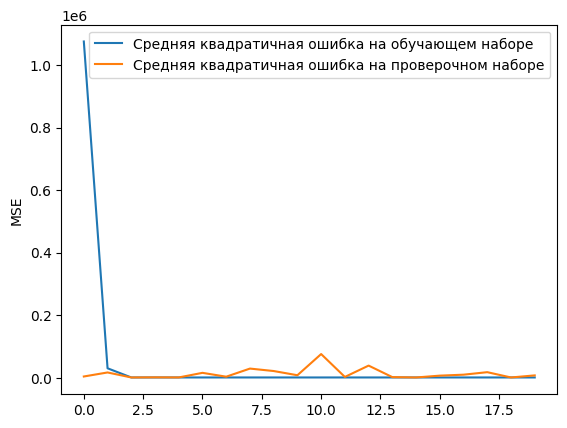

In [24]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 1ms/step


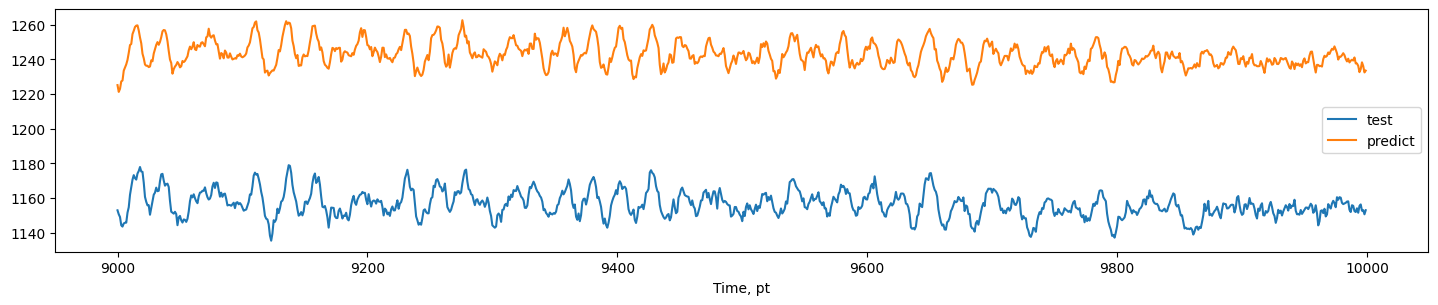

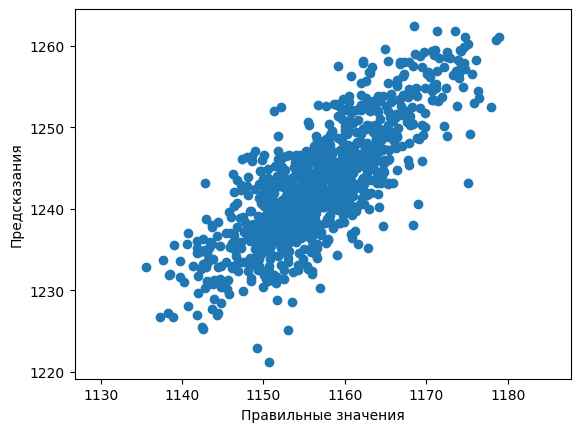

MSE:  7434.682
R2:  -132.965


In [25]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### 2

In [27]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1], activation="linear"))
Dense_model.add(Dense(100, activation="linear"))
#Dense_model.add(Dropout(0.2))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(70, activation="linear"))
#Dense_model.add(Dropout(0.25))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(150, activation="linear",)) #kernel_regularizer=l1(0.01)))
##Dense_model.add(Dropout(0.25))
Dense_model.add(BatchNormalization())
Dense_model.add(Dense(300, activation="linear"))
Dense_model.add(Dense(1, activation="linear"))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               1200      
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 70)                7070      
                                                                 
 dense_15 (Dense)            (None, 150)               10650     
                                                                 
 batch_normalization_2 (Bat  (None, 150)               600       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 300)               45300     
                                                      

Epoch 1/20
144/144 [==============================] - 2s 4ms/step - loss: 1076782.1250 - val_loss: 260781.6875
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 29666.0664 - val_loss: 346082.2188
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 165.1234 - val_loss: 1766.7164
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 166.1298 - val_loss: 4900.0093
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 162.3601 - val_loss: 438.2092
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 165.4940 - val_loss: 126.3341
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 165.6351 - val_loss: 1655.6095
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 160.0381 - val_loss: 6654.5981
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 165.6703 - val_loss: 60044.5117
Epoch 10/20
144/144 [=========================

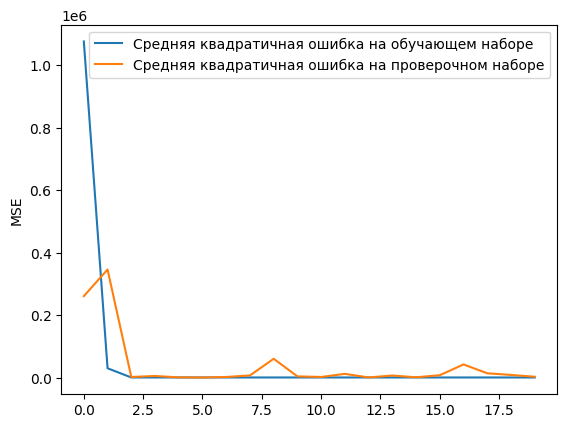

In [28]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


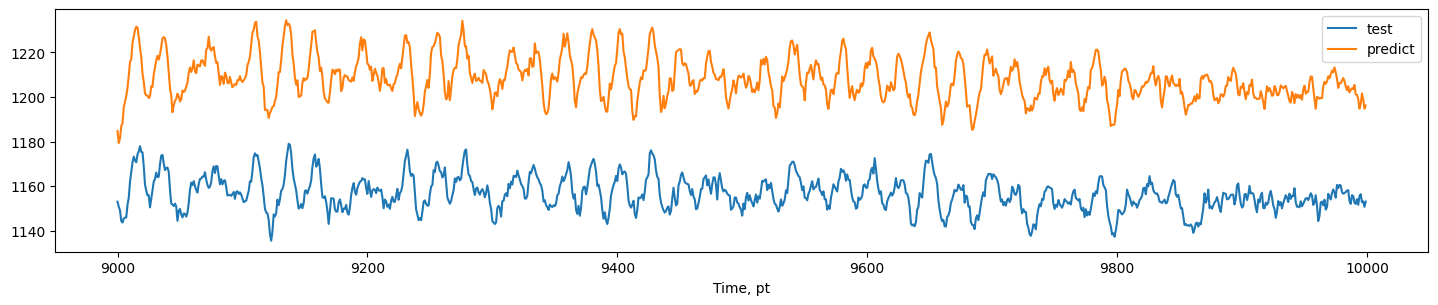

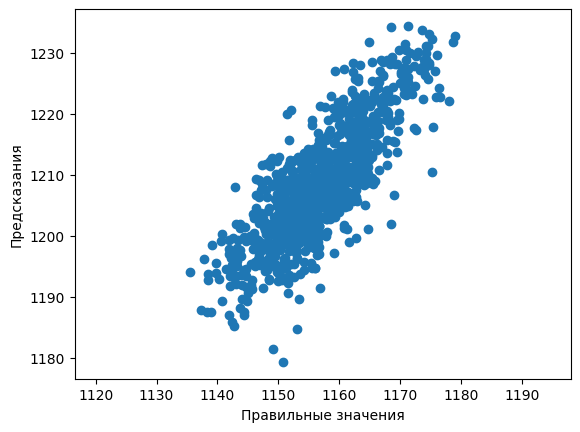

MSE:  2699.031
R2:  -47.634


In [29]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### 3

In [30]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1], activation="linear"))
Dense_model.add(Dense(100, activation="linear"))
Dense_model.add(Dropout(0.1))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(70, activation="linear"))
Dense_model.add(Dropout(0.25))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(150, activation="linear",)) #kernel_regularizer=l1(0.01)))
##Dense_model.add(Dropout(0.25))
Dense_model.add(BatchNormalization())
Dense_model.add(Dense(300, activation="linear"))
Dense_model.add(Dense(1, activation="linear"))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 200)               1200      
                                                                 
 dense_19 (Dense)            (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 70)                7070      
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_21 (Dense)            (None, 150)               10650     
                                                                 
 batch_normalization_3 (Bat  (None, 150)              

Epoch 1/20


144/144 [==============================] - 2s 4ms/step - loss: 1077262.2500 - val_loss: 346414.4375
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 31188.9375 - val_loss: 1606.0955
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 709.2979 - val_loss: 1856.9664
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 476.5295 - val_loss: 89.7791
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 431.3578 - val_loss: 779.8058
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 429.3297 - val_loss: 356.1602
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 391.6036 - val_loss: 173.9253
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 384.1883 - val_loss: 294.9489
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 325.5602 - val_loss: 589.1204
Epoch 10/20
144/144 [==============================] - 0s 3ms/ste

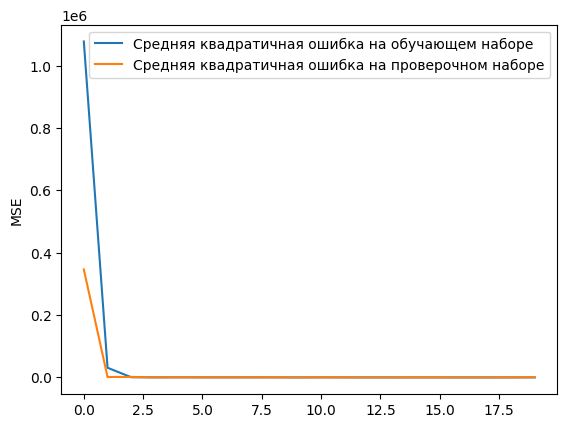

In [31]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


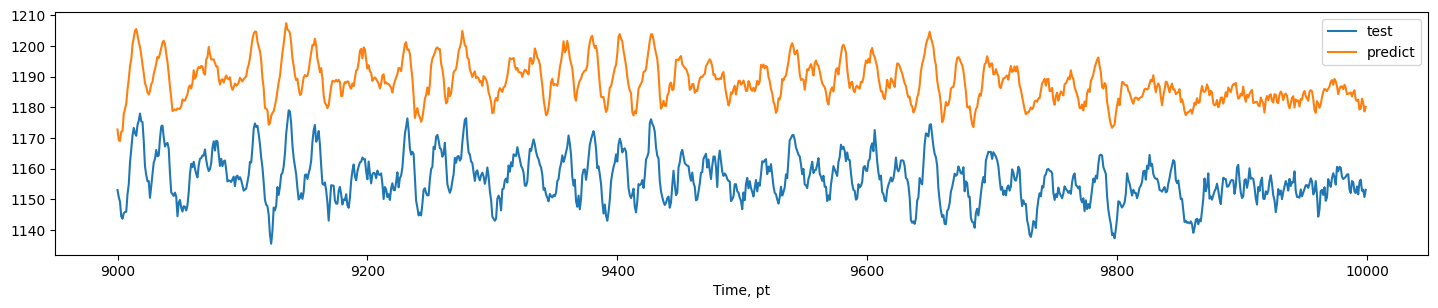

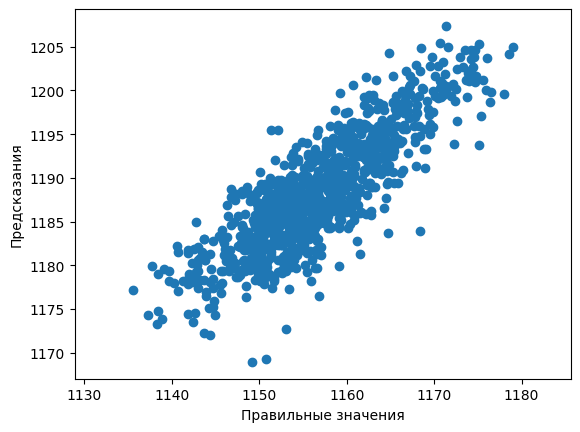

MSE:  1017.402
R2:  -17.332


In [32]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### 4

In [33]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1], activation="linear"))
Dense_model.add(Dense(100, activation="linear"))
# Dense_model.add(Dropout(0.1))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(70, activation="linear"))
Dense_model.add(Dropout(0.1))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(150, activation="linear",)) #kernel_regularizer=l1(0.01)))
##Dense_model.add(Dropout(0.25))
Dense_model.add(BatchNormalization())
Dense_model.add(Dense(300, activation="linear"))
Dense_model.add(Dense(1, activation="linear"))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               1200      
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dense_26 (Dense)            (None, 70)                7070      
                                                                 
 dropout_2 (Dropout)         (None, 70)                0         
                                                                 
 dense_27 (Dense)            (None, 150)               10650     
                                                                 
 batch_normalization_4 (Bat  (None, 150)               600       
 chNormalization)                                                
                                                      

Epoch 1/20
144/144 [==============================] - 2s 4ms/step - loss: 1074691.3750 - val_loss: 427918.5625
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 30578.0352 - val_loss: 13056.7373
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 536.4283 - val_loss: 8073.3984
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 352.1380 - val_loss: 2933.6653
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 433.4535 - val_loss: 1088.2017
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 355.8798 - val_loss: 62.3465
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 263.2429 - val_loss: 427.5099
Epoch 8/20
144/144 [==============================] - 1s 4ms/step - loss: 252.9138 - val_loss: 36.6011
Epoch 9/20
144/144 [==============================] - 1s 3ms/step - loss: 255.9135 - val_loss: 1857.4020
Epoch 10/20
144/144 [==============================

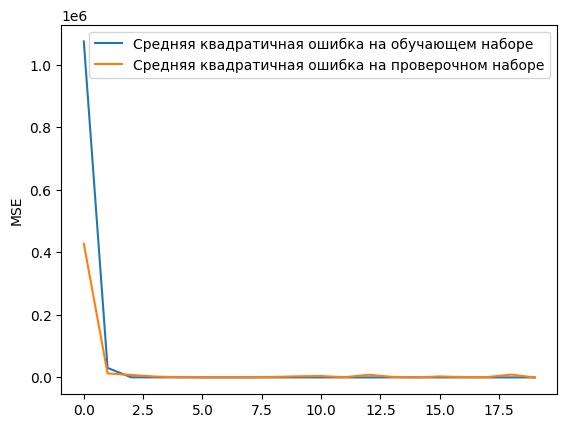

In [34]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 1ms/step


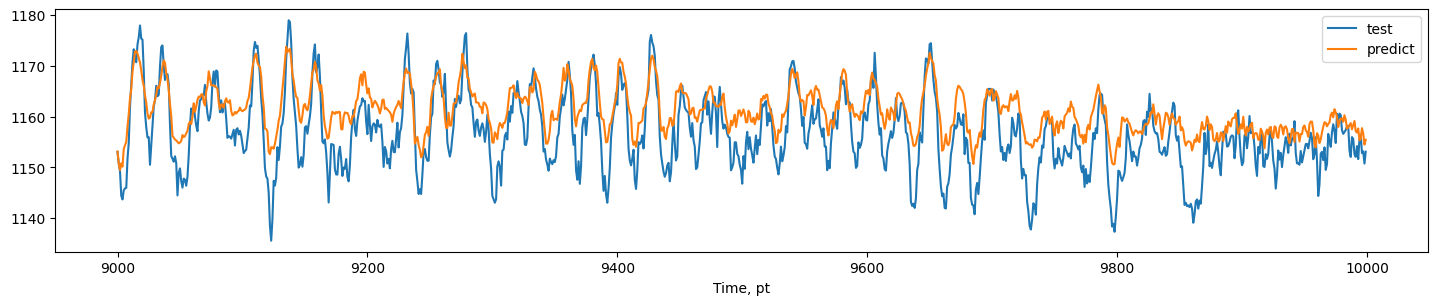

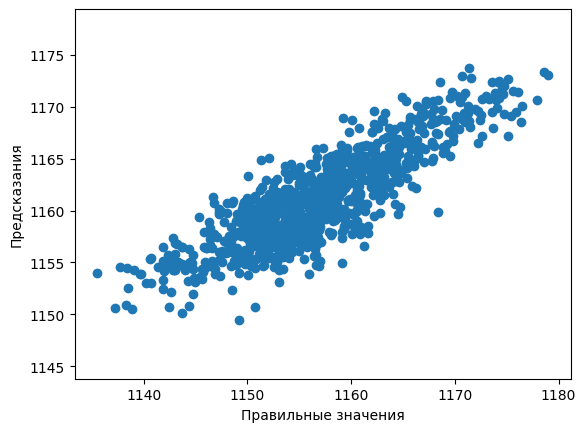

MSE:  37.819
R2:  0.319


In [35]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### 5

In [37]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1], activation="linear"))
Dense_model.add(Dense(100, activation="linear"))
# Dense_model.add(Dropout(0.1))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(70, activation="linear"))
# Dense_model.add(Dropout(0.25))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(150, activation="linear",)) #kernel_regularizer=l1(0.01)))
Dense_model.add(Dropout(0.1))
Dense_model.add(BatchNormalization())
Dense_model.add(Dense(300, activation="linear"))
Dense_model.add(Dense(1, activation="linear"))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 200)               1200      
                                                                 
 dense_37 (Dense)            (None, 100)               20100     
                                                                 
 dense_38 (Dense)            (None, 70)                7070      
                                                                 
 dense_39 (Dense)            (None, 150)               10650     
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 150)               600       
 chNormalization)                                                
                                                      

Epoch 1/20
144/144 [==============================] - 2s 4ms/step - loss: 1086770.2500 - val_loss: 39521420.0000
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 99248.6250 - val_loss: 4051372.0000
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 49495.2188 - val_loss: 3158829.7500
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 33407.0547 - val_loss: 3854867.2500
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 5673.6948 - val_loss: 1501806.6250
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 3467.3486 - val_loss: 173511.8594
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 3357.1277 - val_loss: 5788.0049
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 3130.4207 - val_loss: 28.3752
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 2990.0627 - val_loss: 862.6569
Epoch 10/20
144/144 [====

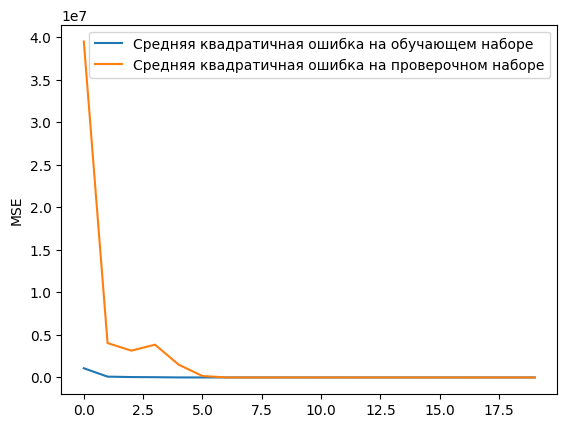

In [38]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


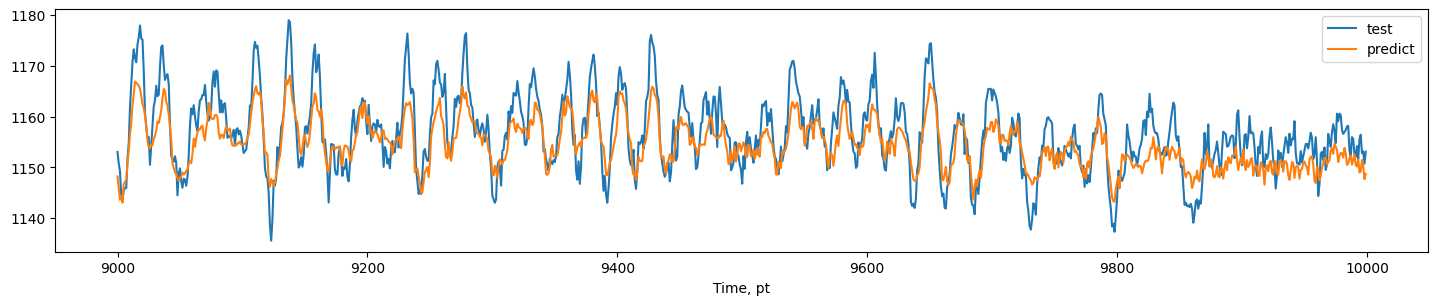

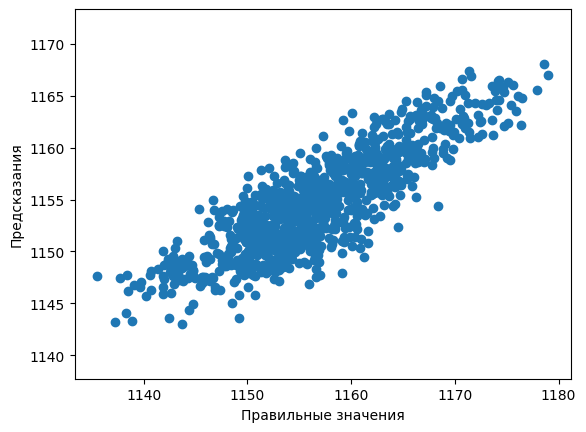

MSE:  22.334
R2:  0.598


In [39]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### 6

In [40]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1], activation="linear"))
Dense_model.add(Dense(100, activation="linear"))
Dense_model.add(Dropout(0.1))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(70, activation="linear"))
#Dense_model.add(Dropout(0.25))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(150, activation="linear",)) #kernel_regularizer=l1(0.01)))
Dense_model.add(Dropout(0.1))
Dense_model.add(BatchNormalization())
Dense_model.add(Dense(300, activation="linear"))
Dense_model.add(Dense(1, activation="linear"))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 200)               1200      
                                                                 
 dense_43 (Dense)            (None, 100)               20100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_44 (Dense)            (None, 70)                7070      
                                                                 
 dense_45 (Dense)            (None, 150)               10650     
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 150)              

Epoch 1/20
144/144 [==============================] - 2s 4ms/step - loss: 1077531.7500 - val_loss: 668886.6250
Epoch 2/20
144/144 [==============================] - 0s 3ms/step - loss: 46219.2227 - val_loss: 2194.0679
Epoch 3/20
144/144 [==============================] - 0s 3ms/step - loss: 12273.9785 - val_loss: 561.9034
Epoch 4/20
144/144 [==============================] - 0s 3ms/step - loss: 10358.1592 - val_loss: 288.1737
Epoch 5/20
144/144 [==============================] - 0s 3ms/step - loss: 8833.2627 - val_loss: 69.6674
Epoch 6/20
144/144 [==============================] - 0s 3ms/step - loss: 9029.5547 - val_loss: 625.7636
Epoch 7/20
144/144 [==============================] - 0s 3ms/step - loss: 7632.9468 - val_loss: 208.9760
Epoch 8/20
144/144 [==============================] - 0s 3ms/step - loss: 6929.6978 - val_loss: 66.2710
Epoch 9/20
144/144 [==============================] - 0s 3ms/step - loss: 6448.3223 - val_loss: 57.4568
Epoch 10/20
144/144 [===========================

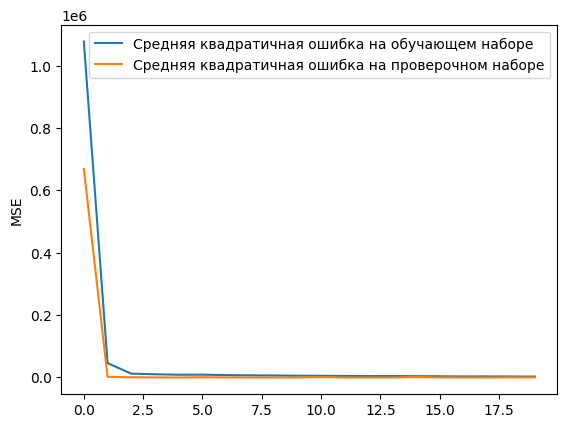

In [41]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=50,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


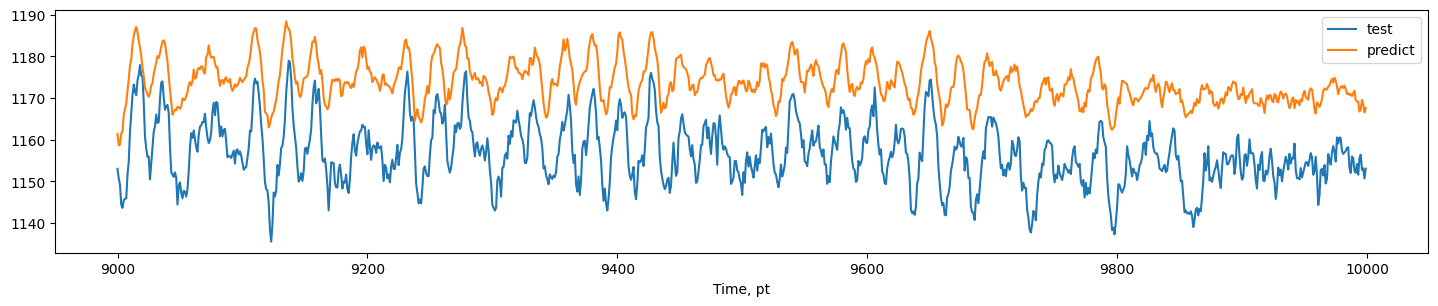

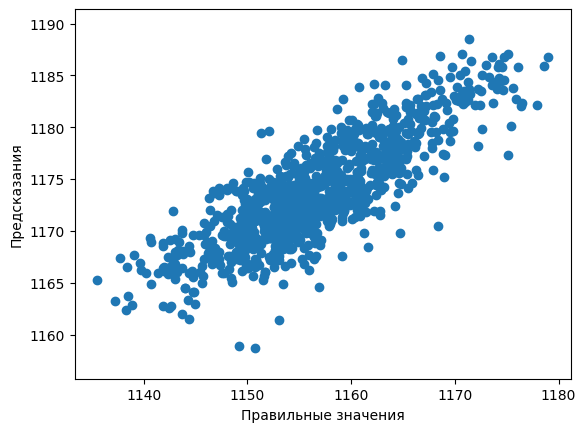

MSE:  313.85
R2:  -4.655


In [42]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)

### 7

In [44]:
Dense_model = Sequential()

Dense_model.add(Dense(200, input_dim = features_train.shape[1], activation="linear"))
Dense_model.add(Dense(100, activation="linear"))
Dense_model.add(Dropout(0.1))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(70, activation="linear"))
#Dense_model.add(Dropout(0.25))
#Dense_model.add(BatchNormalization())
Dense_model.add(Dense(150, activation="linear",)) #kernel_regularizer=l1(0.01)))
Dense_model.add(Dropout(0.1))
Dense_model.add(BatchNormalization())
Dense_model.add(Dense(300, activation="linear"))
Dense_model.add(Dense(1, activation="linear"))

Dense_model.compile(loss="mse", optimizer=Adam(lr=1e-5))
Dense_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 200)               1200      
                                                                 
 dense_55 (Dense)            (None, 100)               20100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_56 (Dense)            (None, 70)                7070      
                                                                 
 dense_57 (Dense)            (None, 150)               10650     
                                                                 
 dropout_10 (Dropout)        (None, 150)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 150)              

Epoch 1/20
288/288 [==============================] - 2s 3ms/step - loss: 571194.1250 - val_loss: 201.9293
Epoch 2/20
288/288 [==============================] - 1s 3ms/step - loss: 13439.3857 - val_loss: 94.9794
Epoch 3/20
288/288 [==============================] - 1s 3ms/step - loss: 10664.9844 - val_loss: 203.5089
Epoch 4/20
288/288 [==============================] - 1s 3ms/step - loss: 8120.1641 - val_loss: 533.1783
Epoch 5/20
288/288 [==============================] - 1s 3ms/step - loss: 6682.9204 - val_loss: 124.8134
Epoch 6/20
288/288 [==============================] - 1s 3ms/step - loss: 5736.2749 - val_loss: 324.2846
Epoch 7/20
288/288 [==============================] - 1s 3ms/step - loss: 5157.3237 - val_loss: 72.5343
Epoch 8/20
288/288 [==============================] - 1s 3ms/step - loss: 4333.7920 - val_loss: 375.5093
Epoch 9/20
288/288 [==============================] - 1s 3ms/step - loss: 3752.4827 - val_loss: 573.0546
Epoch 10/20
288/288 [==============================] 

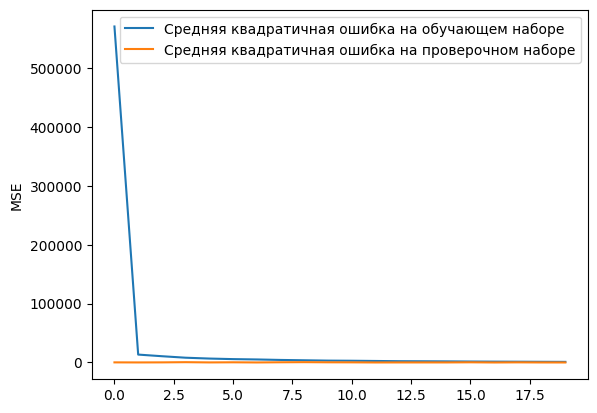

In [45]:
history = Dense_model.fit(features_train,
                        target_train,
                        validation_data=(features_val, target_val),
                        epochs=20,
                        batch_size=25,
                        verbose=1,)

plt.plot(history.history['loss'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя квадратичная ошибка на проверочном наборе')

plt.ylabel('MSE')
plt.legend()
plt.show()

32/32 [==============================] - 0s 1ms/step


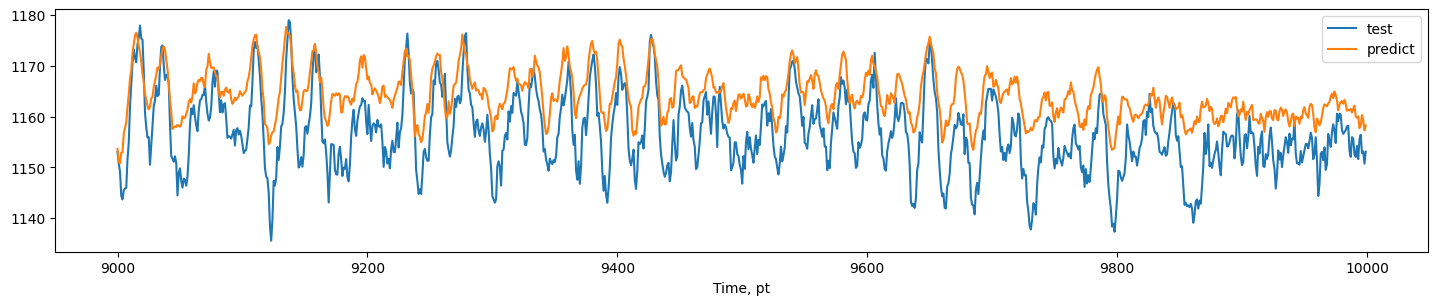

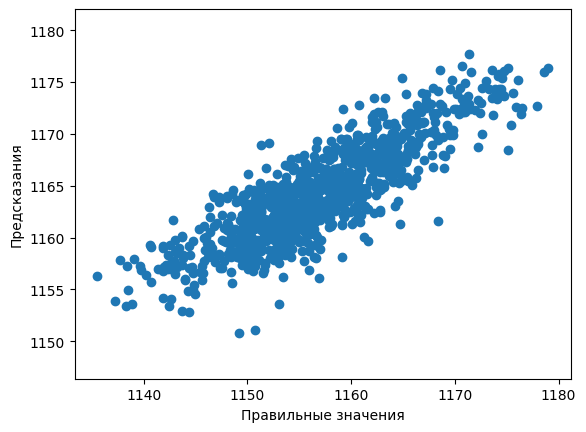

MSE:  74.211
R2:  -0.337


In [46]:
from utils.evaluate_model import evaluate


evaluate(model=Dense_model, features=features_test, target=target_test)